In [4]:
import pandas as pd
file_path = "/content/dermatology_database_1.csv"
data = pd.read_csv(file_path)
data


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

file_path = "/content/dermatology_database_1.csv"
data = pd.read_csv(file_path)

# Replace missing values in numerical columns with the median
imputer = SimpleImputer(strategy="median")
numerical_data = data.select_dtypes(include=['number'])
numerical_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)

# Merge back numerical data with categorical columns (if any)
categorical_data = data.select_dtypes(exclude=['number'])
data_cleaned = pd.concat([numerical_data, categorical_data], axis=1)

# Ensure all columns are numeric after processing
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# Step 3: Splitting Features (X) and Target (y)
X = data_cleaned.drop(columns=['class'])  # Adjust 'class' to match your target column name
y = data_cleaned['class']

# Handle any remaining missing values in features
X.fillna(X.median(), inplace=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train and Evaluate SVM Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm:.2f}")

# Step 5: Train and Evaluate Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")


SVM Model Accuracy: 0.73
Random Forest Model Accuracy: 0.99


In [14]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Removing outliers from numerical data
data_no_outliers = remove_outliers(data_cleaned)

# Step 4: Splitting Features (X) and Target (y)
X = data_no_outliers.drop(columns=['class'])  # Adjust 'class' to match your target column name
y = data_no_outliers['class']

# Handle any remaining missing values in features
X.fillna(X.median(), inplace=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and Evaluate SVM Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy after Outlier Removal: {accuracy_svm:.2f}")

# Step 6: Train and Evaluate Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy after Outlier Removal: {accuracy_rf:.2f}")

SVM Model Accuracy after Outlier Removal: 0.33
Random Forest Model Accuracy after Outlier Removal: 1.00


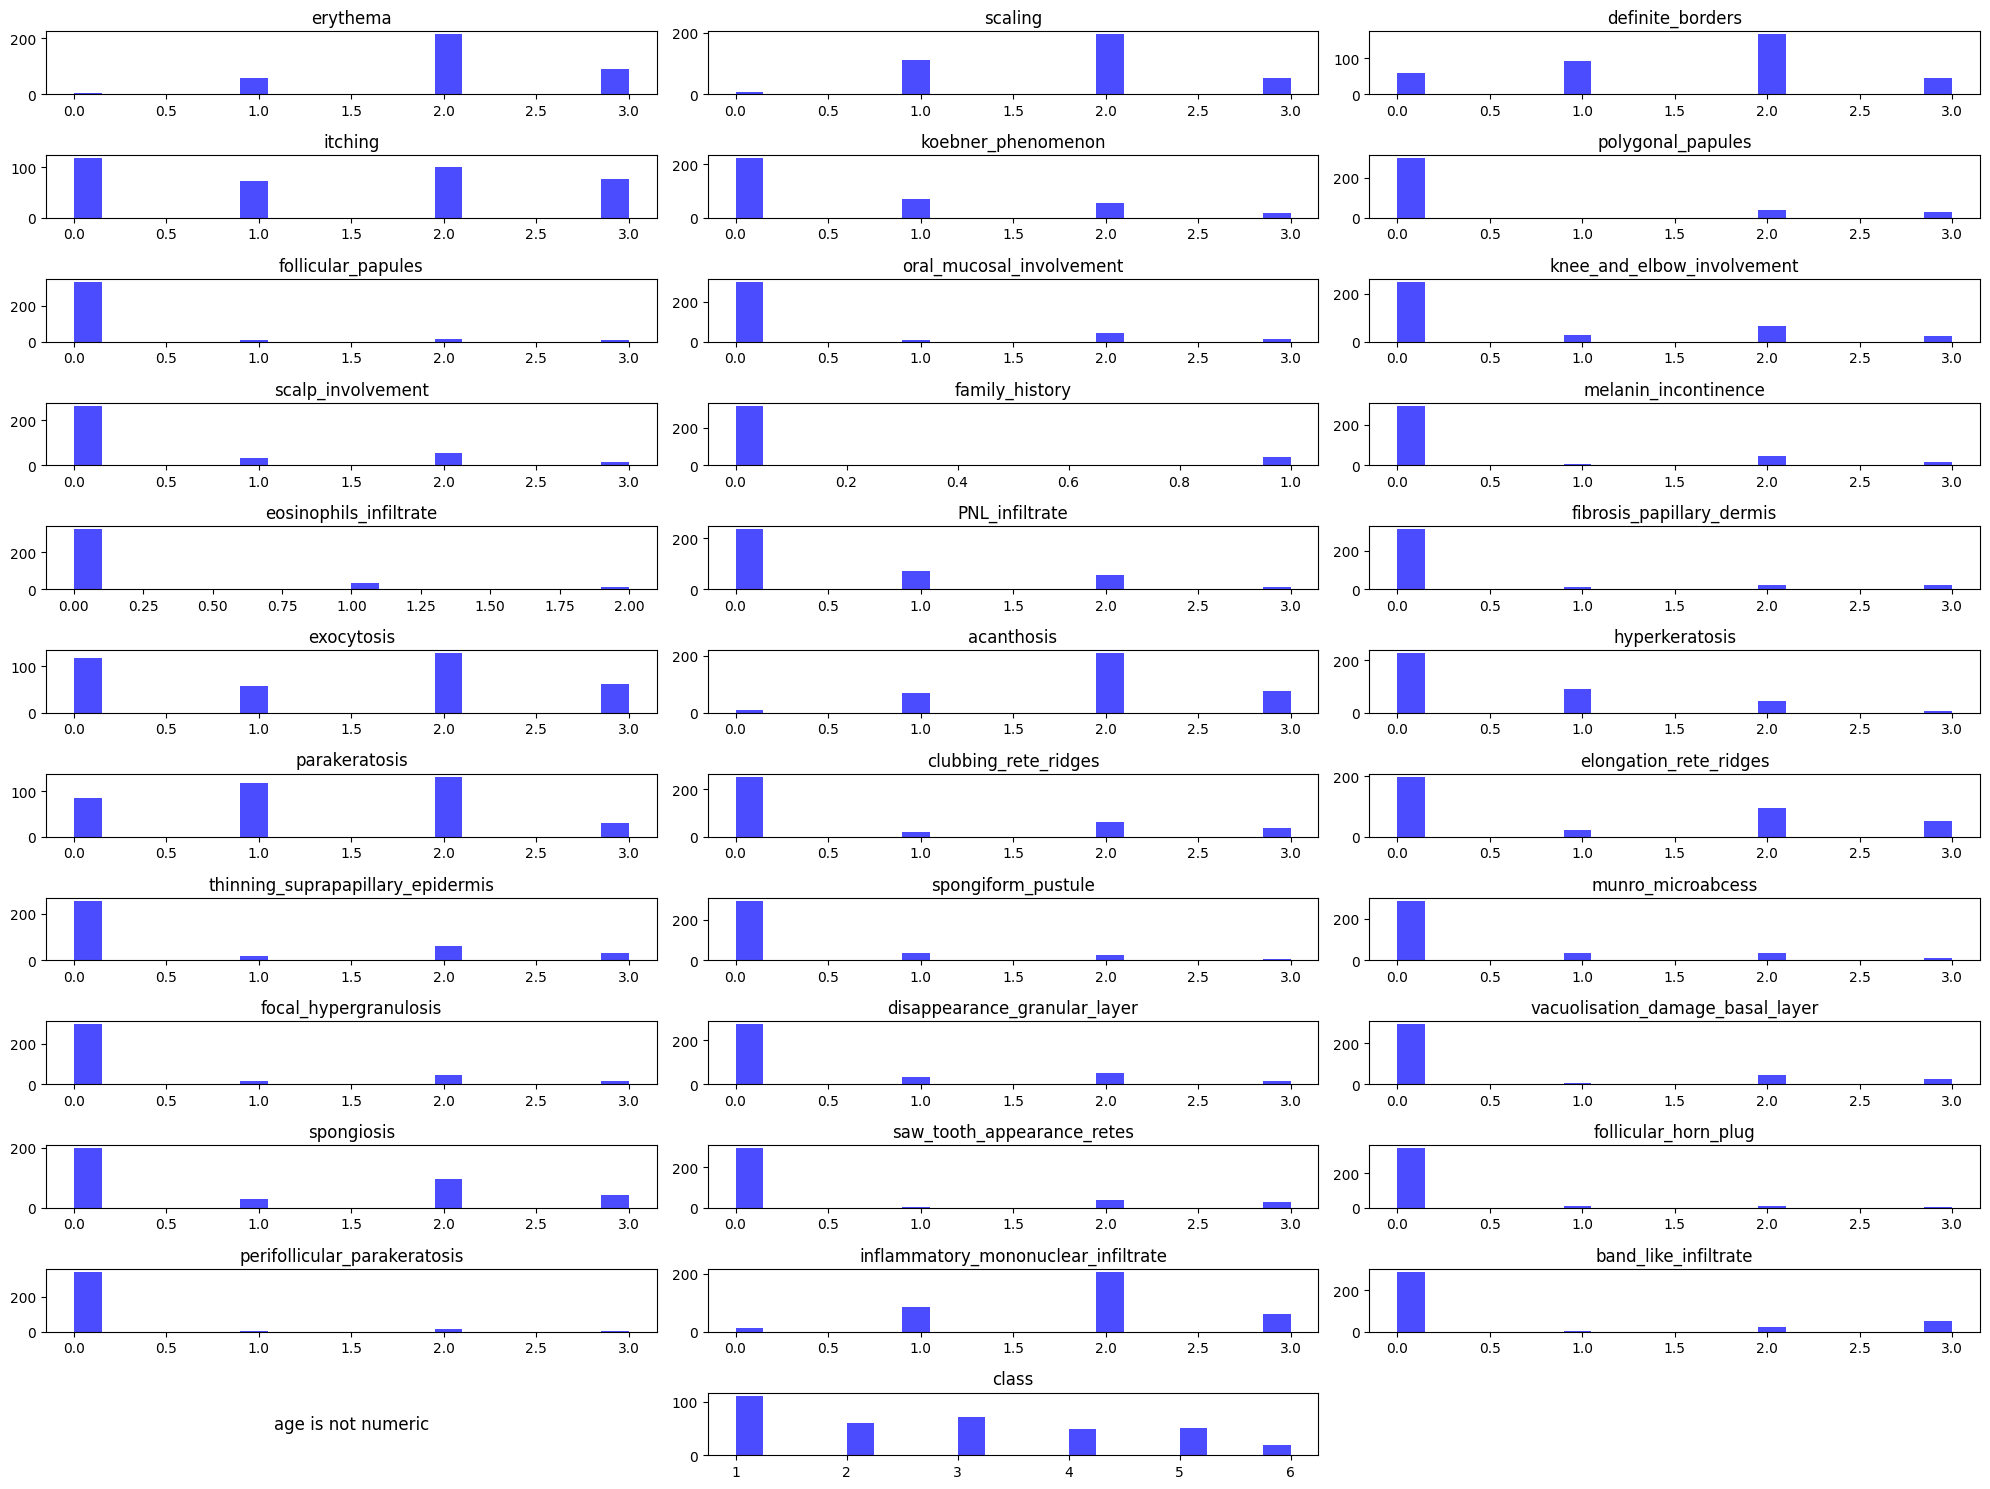

In [16]:

import matplotlib.pyplot as plt
columns = data.columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot((len(columns) + 2) // 3, 3, i)
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.hist(data[column], bins=20, color='blue', alpha=0.7)
        plt.title(column)
    else:
        plt.text(0.5, 0.5, f"{column} is not numeric", fontsize=12, ha='center', va='center')
        plt.axis('off')

plt.tight_layout()
plt.show()
